<a href="https://www.kaggle.com/code/romanniki/website-theme-hypothesis-testing?scriptVersionId=185822678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<font color='black' size='4' face='Tenor Sans'>

## Description
<font color='black' size='4' face='Tenor Sans'>
    
    An online bookstore is looking to optimize its website design to improve user engagement and ultimately increase book purchases. The website currently offers two themes for its users: “Light Theme” and “Dark Theme.” The bookstore’s data science team wants to conduct an A/B testing experiment to determine which theme leads to better user engagement and higher conversion rates for book purchases.

    The data collected by the bookstore contains user interactions and engagement metrics for both the Light Theme and Dark Theme. The dataset includes the following key features:

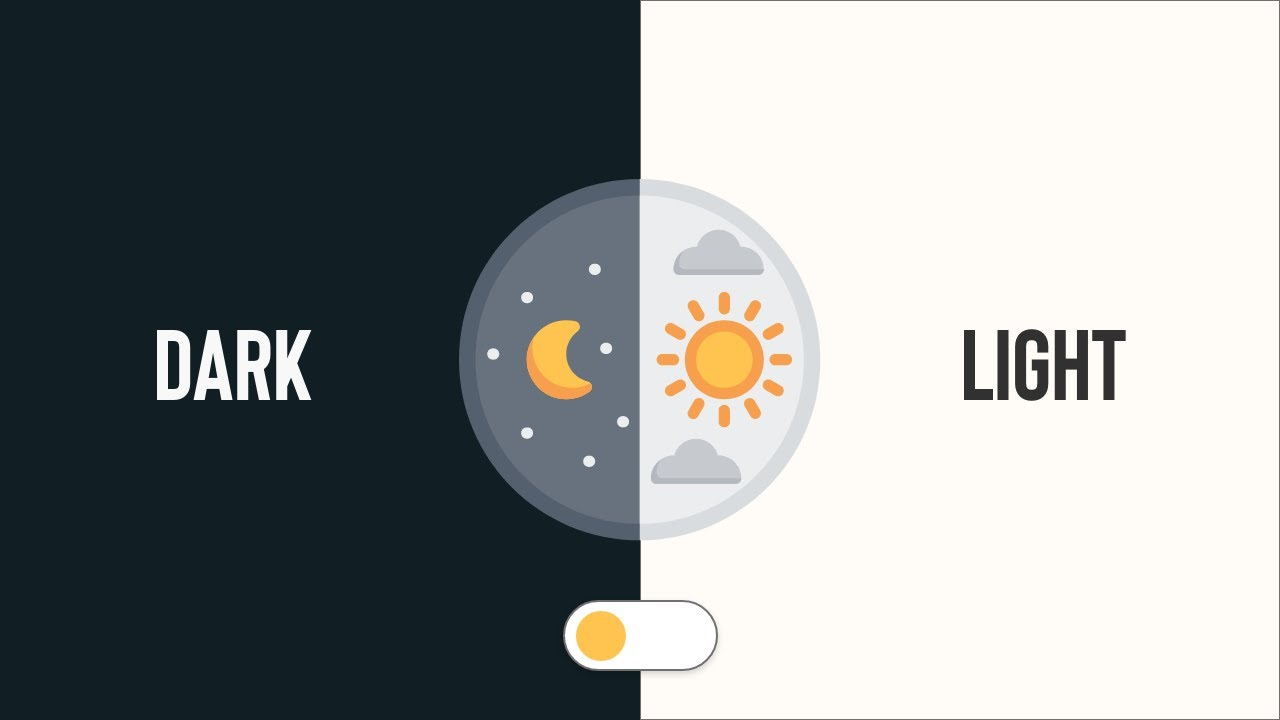

# 1. 📃 Tasks

<font color='black' size='4' face='Tenor Sans'>

    Hypothesis Testing is a fundamental process in data science for making data-driven decisions and inferences about populations based on sample data. Below is the process we can follow for the task of Hypothesis Testing:

    -Gather the necessary data required for the hypothesis test.
    -Define Null (H0) and Alternative Hypothesis (H1 or Ha).
    -Choose the Significance Level (α), which is the probability of rejecting the null hypothesis when it is true.
    -Select the appropriate statistical tests. Examples include t-tests for comparing means, chi-square tests for categorical data, and ANOVA for comparing means across more than two groups.
    -Perform the chosen statistical test on your data.
    -Determine the p-value and interpret the results of your statistical tests.

<font color='black' size='2' face='Tenor Sans'>

# 2. ⚙️ Preparation

In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import ttest_ind
import plotly.graph_objects as go


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/light-theme-and-dark-theme-case-study/website_ab_test.csv


In [2]:
webtest = pd.read_csv('/kaggle/input/light-theme-and-dark-theme-case-study/website_ab_test.csv')
webtest.head(3)

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes


In [3]:
summary = {
    'Number of Records': webtest.shape[0],
    'Number of Columns': webtest.shape[1],
    'Missing Values': webtest.isnull().sum(),
    'Summary': webtest.describe()
}

summary

{'Number of Records': 1000,
 'Number of Columns': 10,
 'Missing Values': Theme                 0
 Click Through Rate    0
 Conversion Rate       0
 Bounce Rate           0
 Scroll_Depth          0
 Age                   0
 Location              0
 Session_Duration      0
 Purchases             0
 Added_to_Cart         0
 dtype: int64,
 'Summary':        Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
 count         1000.000000      1000.000000  1000.000000   1000.000000   
 mean             0.256048         0.253312     0.505758     50.319494   
 std              0.139265         0.139092     0.172195     16.895269   
 min              0.010767         0.010881     0.200720     20.011738   
 25%              0.140794         0.131564     0.353609     35.655167   
 50%              0.253715         0.252823     0.514049     51.130712   
 75%              0.370674         0.373040     0.648557     64.666258   
 max              0.499989         0.498916     0.799658    

In [4]:
numeric_columns = webtest.select_dtypes(include=['number']).columns
theme_performance = webtest.groupby('Theme')[numeric_columns].mean()

theme_performance_sorted = theme_performance.sort_values(by='Conversion Rate', ascending=False)
print(theme_performance_sorted)

             Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \

Theme                                                                         

Light Theme            0.247109         0.255459     0.499035     50.735232   

Dark Theme             0.264501         0.251282     0.512115     49.926404   



                   Age  Session_Duration  

Theme                                     

Light Theme  41.734568        930.833333  

Dark Theme   41.332685        919.482490  


<font color='black' size='4' face='Tenor Sans'>

#### Comparison between the Light Theme and Dark Theme  
      
  
    Click Through Rate (CTR)
    Observation: The Dark Theme has a higher CTR, indicating that users are more likely to click on links or buttons when using the Dark Theme.  
      
    Conversion Rate
    Observation: The Light Theme has a slightly higher conversion rate, suggesting that users are marginally more likely to complete desired actions (e.g., purchases, sign-ups) in the Light Theme.  
      
    Bounce Rate
    Observation: The Light Theme has a lower bounce rate, meaning users are less likely to leave the site after viewing just one page compared to the Dark Theme.  
      
    Scroll Depth
    Observation: Users tend to scroll slightly more in the Light Theme, indicating potentially better engagement with the content.  
    
    Age
    Observation: The average age of users is marginally higher for the Light Theme compared to the Dark Theme.  
      
    Session Duration
    Observation: Users spend a bit more time on the site when using the Light Theme, suggesting a longer engagement period.  
      
    Overall Conclusion
    While the Dark Theme shows a higher Click Through Rate, the Light Theme outperforms in Conversion Rate, Bounce Rate, Scroll Depth, and Session Duration. This suggests that the Light Theme might be more effective in retaining users and encouraging them to complete desired actions, despite the Dark Theme's better performance in initial engagement metrics.


# 3. 🧪 Hypothesis Testing

<font color='black' size='4' face='Tenor Sans'>

### Methodology

    To ensure the robustness of our findings, we conducted hypothesis testing on each metric. We calculated the T-statistics and corresponding P-values to assess whether the observed differences in user behavior between the two themes were statistically significant. Below is a summary table of our results:

<font color='black' size='4' face='Tenor Sans'>

### Taxonomy

#### Null Hypothesis (H0):
    The null hypothesis is the default assumption that there is no effect or no difference between groups.  
        
#### Alternative Hypothesis (H1):
    The alternative hypothesis is what you aim to support, suggesting that there is an effect or a difference between groups:

<font color='black' size='4' face='Tenor Sans'>

#### T-Statistic:
    
        The T-statistic measures the difference between the means of two groups in units of standard error. It indicates how many standard deviations the sample mean difference is from the null hypothesis mean (which typically assumes no difference). A higher absolute value of the T-statistic suggests a greater difference between the groups. The sign indicates the direction of the difference:

    Positive T-statistic: The mean of the first group is higher.
    Negative T-statistic: The mean of the first group is lower.

<font color='black' size='4' face='Tenor Sans'>

#### P-Value:
    
    The P-value represents the probability that the observed difference (or a more extreme one) would occur if the null hypothesis were true (no actual difference). It helps determine the statistical significance of the results:

    Low P-Value (≤ 0.05): Strong evidence against the null hypothesis, leading to its rejection. Indicates statistical significance.
    High P-Value (> 0.05): Weak evidence against the null hypothesis, leading to its acceptance. Indicates lack of statistical significance.

<font color='black' size='4' face='Tenor Sans'>

#### Alpha (α):
    
    Alpha is the significance level, a pre-determined threshold (commonly set at 0.05) used to compare the P-value against:

    Alpha = 0.05: This means you are willing to accept a 5% chance of making a Type I error (incorrectly rejecting the null hypothesis).
    If P-Value ≤ Alpha: The results are statistically significant, and you reject the null hypothesis.
    If P-Value > Alpha: The results are not statistically significant, and you fail to reject the null hypothesis.

## 3.1 Conversion Rate

 <font color='black' size='4' face='Tenor Sans'>
 
     Let’s start with hypothesis testing based on the Conversion Rate between the Light Theme and Dark Theme. Our hypotheses are as follows:

    Null Hypothesis (H0​): There is no difference in Conversion Rates between the Light Theme and Dark Theme.
    Alternative Hypothesis (Ha​): There is a difference in Conversion Rates between the Light Theme and Dark Theme.
    We’ll use a two-sample t-test to compare the means of the two independent samples. Let’s proceed with the test.
    
<font color='black' size='2' face='Tenor Sans'>

In [5]:
# extracting conversion rates for both themes
conversion_rates_light = webtest[webtest['Theme'] == 'Light Theme']['Conversion Rate']
conversion_rates_dark = webtest[webtest['Theme'] == 'Dark Theme']['Conversion Rate']

# performing a two-sample t-test
t_stat, p_value = ttest_ind(conversion_rates_light, conversion_rates_dark, equal_var=False)

t_stat, p_value

(0.4748494462782632, 0.6349982678451778)

In [6]:
alpha = 0.05 

themes = ['Light Theme vs Dark Theme']
p_values = [p_value]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=themes,
    y=p_values,
    mode='markers',
    marker=dict(size=15),
    text=['P-Value: {:.4f}'.format(p) for p in p_values],
    name='P-Value'
))

fig.add_shape(
    type='rect',
    xref='x',
    yref='y',
    x0=-0.5,
    y0=0,
    x1=0.5,
    y1=alpha,
    fillcolor='rgba(255, 0, 0, 0.3)',
    line=dict(width=0),
    name='Significance Level'
)

fig.add_annotation(
    x=themes[0],
    y=alpha / 2,
    text=f'Significance Level: {alpha}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40 
)

fig.update_layout(
    title='Comparison of Conversion Rate P-Value between Light Theme and Dark Theme',
    yaxis=dict(
        title='P-Value',
        tickmode='linear',
        tick0=0,
        dtick=0.1,
        range=[max(p_values) + 0.1, 0] 
    ),
    showlegend=True
)

fig.show()

<font color='black' size='4' face='Tenor Sans'>
    
    Interpretation:
        The test statistic (t_stat) is a measure of how many standard deviations the difference in sample means is away from the null hypothesis of no difference.
        The p-value indicates the probability of observing the test results under the null hypothesis.  
      
        
    Conclusion:
        Significance Level (alpha): 0.05
        The p-value (0.6349982678451778) is much greater than the significance level (0.05).
        
    Decision:
        Fail to reject the null hypothesis.  
        
    Summary:
        Based on the results of the two-sample t-test, there is no statistically significant difference in the conversion rates between the Light Theme and Dark Theme at the 0.05 significance level. This means that any observed difference in conversion rates could likely be due to random chance rather than a true effect of the theme.
    
    
<font color='black' size='2' face='Tenor Sans'>

## 3.2 CTR Rate

In [7]:
ctr_light = webtest[webtest['Theme'] == 'Light Theme']['Click Through Rate']
ctr_dark = webtest[webtest['Theme'] == 'Dark Theme']['Click Through Rate']

t_stat_ctr, p_value_ctr = ttest_ind(ctr_light, ctr_dark, equal_var=False)

t_stat_ctr, p_value_ctr

(-1.9781708664172253, 0.04818435371010704)

In [8]:
alpha = 0.05 

themes = ['Light Theme vs Dark Theme']
p_values = [p_value_ctr]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=themes,
    y=p_values,
    mode='markers',
    marker=dict(size=15),
    text=['P-Value: {:.4f}'.format(p) for p in p_values],
    name='P-Value'
))

fig.add_shape(
    type='rect',
    xref='x',
    yref='y',
    x0=-0.5,
    y0=0,
    x1=0.5,
    y1=alpha,
    fillcolor='rgba(255, 0, 0, 0.3)',
    line=dict(width=0),
    name='Significance Level'
)

fig.add_annotation(
    x=themes[0],
    y=alpha / 2,
    text=f'Significance Level: {alpha}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40  
)

fig.update_layout(
    title='Comparison of Click Through Rate (CTR) P-Value between Light Theme and Dark Theme',
    yaxis=dict(
        title='P-Value',
        tickmode='linear',
        tick0=0,
        dtick=0.1,
        range=[max(p_values) + 0.1, 0]  
    ),
    showlegend=True
)

fig.show()

<font color='black' size='4' face='Tenor Sans'>

    Conclusion:
        Significance Level (alpha): 0.05
        The p-value (0.04818435371010704) is slightly less than the significance level (0.05).
          
    Decision: 
        Reject the null hypothesis.
      
    Summary:
        Based on the results of the two-sample t-test, there is a statistically significant difference in the Click Through Rates between the Light Theme and Dark Theme at the 0.05 significance level. This means that the difference observed in Click Through Rates is unlikely to be due to random chance. We can conclude that the Dark Theme performs better in terms of Click Through Rate.
    
<font color='black' size='2' face='Tenor Sans'>

## 3.3 Bounce Rate

In [9]:
bounce_rates_light = webtest[webtest['Theme'] == 'Light Theme']['Bounce Rate']
bounce_rates_dark = webtest[webtest['Theme'] == 'Dark Theme']['Bounce Rate']

t_stat_bounce, p_value_bounce = ttest_ind(bounce_rates_light, bounce_rates_dark, equal_var=False)

t_stat_bounce, p_value_bounce

(-1.2018883310494073, 0.229692077505148)

<font color='black' size='4' face='Tenor Sans'>

    Conclusion:
        p-value: The p-value is 0.2297, which is greater than the significance level of 0.05.
        
    Decision:
        Fail to reject the null hypothesis (H0). 
    
    Summary:
        There is no statistically significant difference in the Bounce Rates between the Light Theme and Dark Theme.
    
    
 <font color='black' size='2' face='Tenor Sans'>

In [10]:
alpha = 0.05  

themes = ['Light Theme vs Dark Theme']
p_values = [p_value_bounce]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=themes,
    y=p_values,
    mode='markers',
    marker=dict(size=15),
    text=['P-Value: {:.4f}'.format(p) for p in p_values],
    name='P-Value'
))

fig.add_shape(
    type='rect',
    xref='x',
    yref='y',
    x0=-0.5,
    y0=0,
    x1=0.5,
    y1=alpha,
    fillcolor='rgba(255, 0, 0, 0.3)',
    line=dict(width=0),
    name='Significance Level'
)

fig.add_annotation(
    x=themes[0],
    y=alpha / 2,
    text=f'Significance Level: {alpha}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40  
)

fig.update_layout(
    title='Comparison of Bounce Rate P-Value between Light Theme and Dark Theme',
    yaxis=dict(
        title='P-Value',
        tickmode='linear',
        tick0=0,
        dtick=0.1,
        range=[max(p_values) + 0.1, 0]  
    ),
    showlegend=True
)

fig.show()

## 3.4 Scroll Rate

In [11]:
scroll_depth_light = webtest[webtest['Theme'] == 'Light Theme']['Scroll_Depth']
scroll_depth_dark = webtest[webtest['Theme'] == 'Dark Theme']['Scroll_Depth']

t_stat_scroll, p_value_scroll = ttest_ind(scroll_depth_light, scroll_depth_dark, equal_var=False)

t_stat_scroll, p_value_scroll

(0.7562277864140986, 0.4496919249484911)

<font color='black' size='4' face='Tenor Sans'>

    Conclusion:
    p-value: The p-value is 0.4497, which is greater than the significance level of 0.05.
    
    Decision:
        Fail to reject the null hypothesis (H0). 
        
    Summary:  
        There is no statistically significant difference in the Scroll Depth between the Light Theme and Dark Theme.
    
<font color='black' size='2' face='Tenor Sans'>

In [12]:
alpha = 0.05  

themes = ['Light Theme vs Dark Theme']
p_values = [p_value_scroll]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=themes,
    y=p_values,
    mode='markers',
    marker=dict(size=15),
    text=['P-Value: {:.4f}'.format(p) for p in p_values],
    name='P-Value'
))

fig.add_shape(
    type='rect',
    xref='x',
    yref='y',
    x0=-0.5,
    y0=0,
    x1=0.5,
    y1=alpha,
    fillcolor='rgba(255, 0, 0, 0.3)',
    line=dict(width=0),
    name='Significance Level'
)

fig.add_annotation(
    x=themes[0],
    y=alpha / 2,
    text=f'Significance Level: {alpha}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40  
)

fig.update_layout(
    title='Comparison of Scroll Depth P-Value between Light Theme and Dark Theme',
    yaxis=dict(
        title='P-Value',
        tickmode='linear',
        tick0=0,
        dtick=0.1,
        range=[max(p_values) + 0.1, 0] 
    ),
    showlegend=True
)

fig.show()

# 4. 📚 Comparison

In [13]:
comparison_table = pd.DataFrame({
    'Metric': ['Click Through Rate', 'Conversion Rate', 'Bounce Rate', 'Scroll Depth'],
    'T-Statistic': [t_stat_ctr, t_stat, t_stat_bounce, t_stat_scroll],
    'P-Value': [p_value_ctr, p_value, p_value_bounce, p_value_scroll]
})

In [14]:
comparison_table = pd.DataFrame({
    'Metric': ['Click Through Rate', 'Conversion Rate', 'Bounce Rate', 'Scroll Depth'],
    'T-Statistic': [t_stat_ctr, t_stat, t_stat_bounce, t_stat_scroll],
    'P-Value': [p_value_ctr, p_value, p_value_bounce, p_value_scroll]
})

colors = ['green' if p < 0.05 else 'red' for p in comparison_table['P-Value']]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=comparison_table['Metric'],
    y=comparison_table['P-Value'],
    text=comparison_table['P-Value'].round(4),
    textposition='auto',
    marker_color=colors,
    name='P-Value'
))

fig.add_shape(
    type='line',
    x0=-0.5,
    y0=0.05,
    x1=3.5,
    y1=0.05,
    line=dict(color='blue', width=2, dash='dash'),
    name='Significance Level'
)

fig.add_annotation(
    x=-0.5,
    y=0.05,
    text='Significance Level (alpha = 0.05)',
    showarrow=False,
    yshift=10,
    font=dict(color='blue')
)

# Customize layout
fig.update_layout(
    title='P-Values for Different Metrics',
    xaxis_title='Metric',
    yaxis_title='P-Value',
    yaxis=dict(range=[0, max(comparison_table['P-Value']) + 0.1]),
    showlegend=False
)

fig.show()

<font color='black' size='4' face='Tenor Sans'>

    Click Through Rate: The test reveals a statistically significant difference, with the Dark Theme likely performing better (P-Value = 0.048).
    Conversion Rate: No statistically significant difference was found (P-Value = 0.635).
    Bounce Rate: There’s no statistically significant difference in Bounce Rates between the themes (P-Value = 0.230).
    Scroll Depth: Similarly, no statistically significant difference is observed in Scroll Depths (P-Value = 0.450).

# 5. 📊 Conclusion and Recommendations

<font color='black' size='4' face='Tenor Sans'>

    Hypothesis Testing is a statistical method used to make inferences or decisions about a population based on sample data. It starts with a null hypothesis (H0), which represents a default stance or no effect, and an alternative hypothesis (H1 or Ha), which represents what we aim to prove or expect to find. The process involves using sample data to determine whether to reject the null hypothesis in favor of the alternative hypothesis, based on the likelihood of observing the sample data under the null hypothesis.

<font color='black' size='4' face='Tenor Sans'>

    Conclusion:
        Based on our analysis, we can conclude that while the two themes perform similarly across most metrics, the Dark Theme has a slight edge in terms of engaging users to click through. This finding, although marginal, could be beneficial in scenarios where click-through rates are a critical component of our user engagement strategy.

        For other key performance indicators such as Conversion Rate, Bounce Rate, and Scroll Depth, our data indicates that the choice between a Light Theme and a Dark Theme does not significantly affect user behavior.

<font color='black' size='4' face='Tenor Sans'>

    Recommendation:
    
        Given these findings, I recommend adopting the Dark Theme where increasing the click-through rate is a priority. However, for overall user experience and other performance metrics, either theme can be used without expecting significant differences in user behavior.

        I hope these insights will guide you in making informed decisions about the user interface design. Thank you for your attention, and welcome any questions you may have regarding this analysis.